Advertising Sales Channel Prediction

Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Advertising.csv

In [1]:
#Importing required packages & libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

#Checking how the data is distributed
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Checking the information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# finding the no. of rows and coloumns
df.shape

(200, 5)

In [5]:
# checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
# checking the stats
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Data Visualization

<AxesSubplot:xlabel='sales', ylabel='Density'>

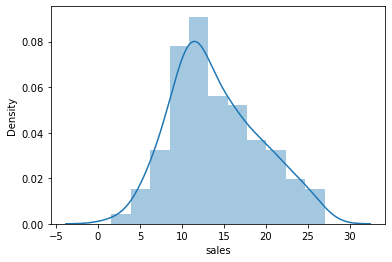

In [7]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

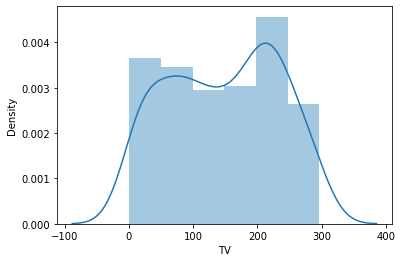

In [8]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

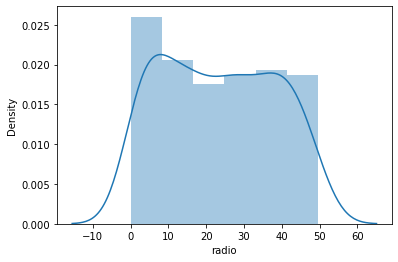

In [9]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

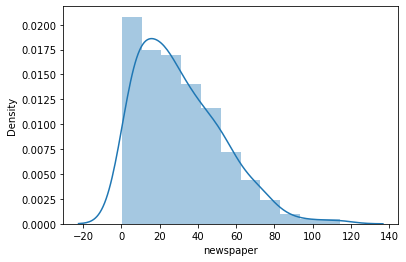

In [10]:
sns.distplot(df['newspaper'])

Thee is skewness in newspaper column

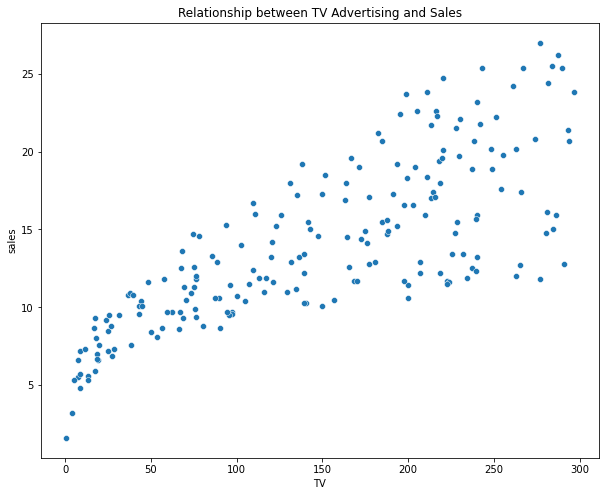

In [11]:
plt.figure(figsize=[10,8])
plt.title('Relationship between TV Advertising and Sales')
sns.scatterplot(df['TV'], df['sales']);   #The plot shows that with increased TV advertising the sales are also increased.

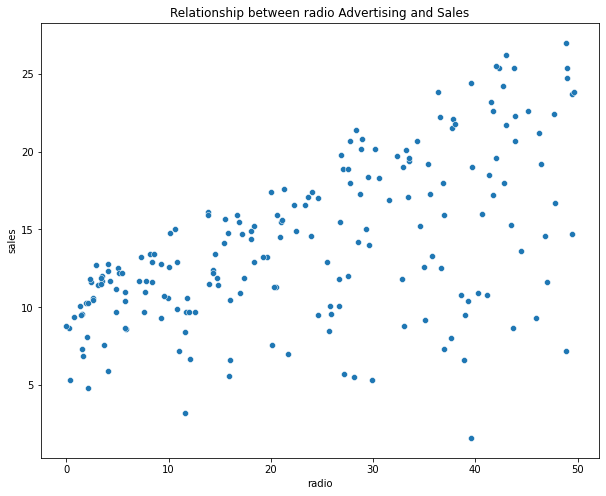

In [12]:
plt.figure(figsize=[10,8])
plt.title('Relationship between radio Advertising and Sales')
sns.scatterplot(df['radio'], df['sales']);    #This plot also shows increase in sales but lesser than TV advertising.

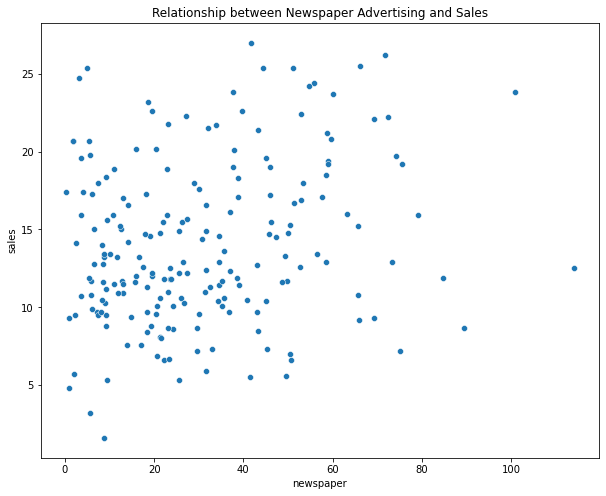

In [13]:
plt.figure(figsize=[10,8])
plt.title('Relationship between Newspaper Advertising and Sales')
sns.scatterplot(df['newspaper'], df['sales']);    
  
#The plot shows incrased sales in the beginning but with increased advertising the sales are not having a positive growth.

With TV & Radio showing better performance, it is undoubtedly that these two has a better impact & correlation than newspaper. 

In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error


import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [15]:
# checking corelation
corr_mat=df.corr()
corr_mat

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


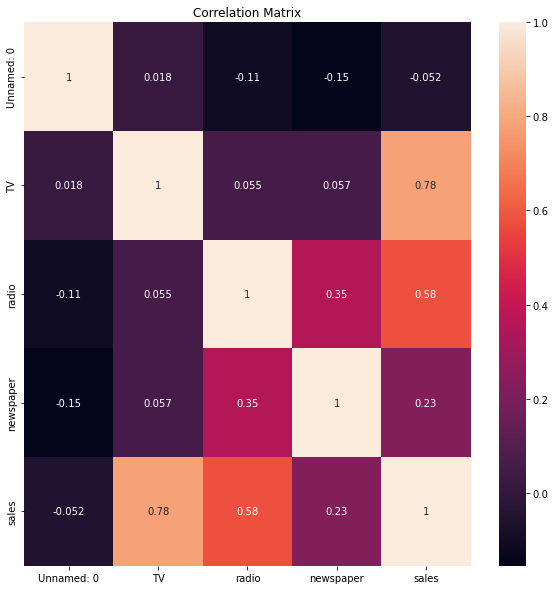

In [16]:
plt.figure(figsize=[10,10])  #plotting heatmap
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

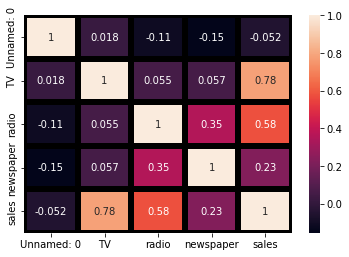

In [17]:
sns.heatmap(corr_mat,annot=True,linewidths=6,linecolor='black')

In [18]:
corr_mat["sales"].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

The correlation checking via the hatmap shows that it TV & radio are highly correlated

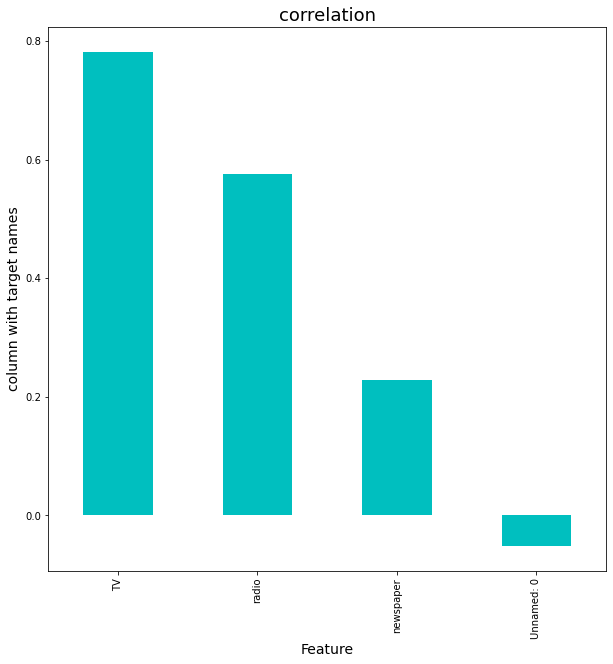

In [19]:
plt.figure(figsize=(10,10))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

The plot shows TV has grea ter sales compared to radio and followed by newspaper

In [20]:
x=df.drop("sales",axis=1) #feature seperation
y=df["sales"]

In [21]:
x.skew() #finding skewness


Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
dtype: float64

There is more skewness in TV so we need to handle it

In [22]:
from sklearn.preprocessing import power_transform  #apply ing power transform
df_skew=power_transform(x)

df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [23]:
# Removing Skewness through Power Transforms
df_skew.skew()

Unnamed: 0   -0.268270
TV           -0.315199
radio        -0.242968
newspaper    -0.077942
dtype: float64

All the columns now show skewness within range of -0.5 to +0.5

In [24]:
df=df_skew
x=df_skew

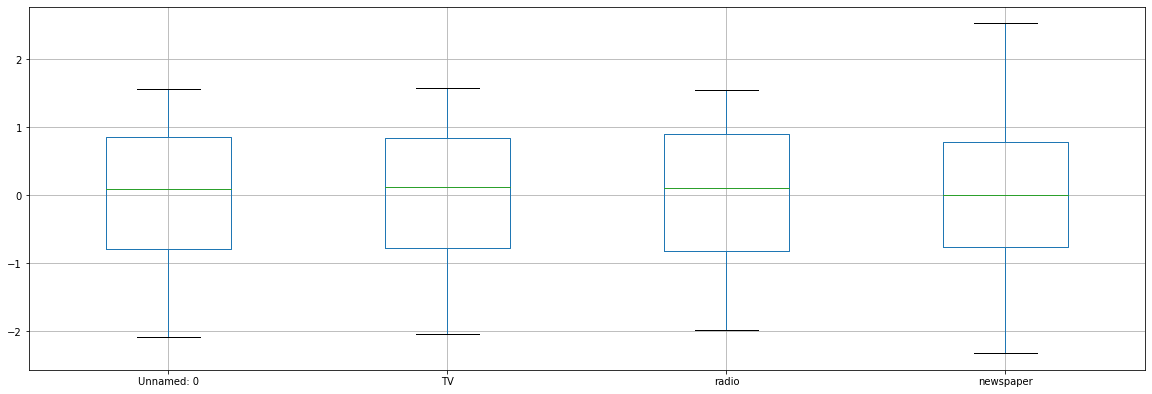

In [25]:
#checking for outliers

x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

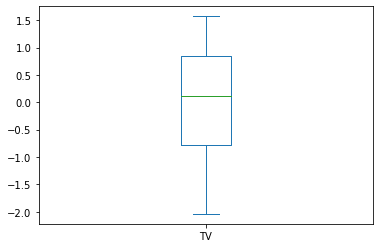

In [26]:
df['TV'].plot.box()

<AxesSubplot:>

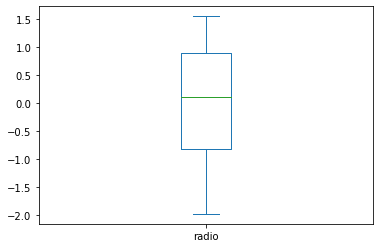

In [27]:
df['radio'].plot.box()

<AxesSubplot:>

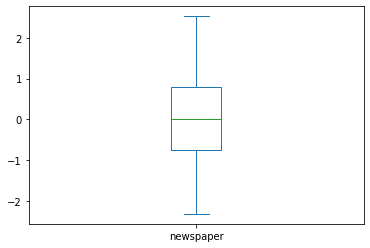

In [28]:
df['newspaper'].plot.box()

Data Standardization

We can see there are no outliers

In [29]:
# Scaling the Feature data

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[-2.07937596,  0.94867429,  0.96224689,  1.51433531],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [-1.990711  , -1.6477566 ,  1.37070964,  1.51699753],
       [-1.95139683,  0.14102023,  1.14238689,  1.21465643],
       [-1.91424742,  0.45271493, -0.74865064,  1.21170398],
       [-1.87880665, -1.82382233,  1.51501853,  1.66502354],
       [-1.8447658 , -1.00249116,  0.69372704, -0.1077535 ],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-1.7800535 , -1.82609501, -1.63345378, -2.13259669],
       [-1.74908785,  0.64764492, -1.56676988, -0.22900395],
       [-1.71890445, -0.88377378, -1.20298758, -0.07226156],
       [-1.68942058,  0.79708355,  0.18072579, -1.60261898],
       [-1.66056789, -1.52641627,  0.81900563,  1.42512925],
       [-1.63228912, -0.48036844, -1.02813642, -1.22982506],
       [-1.60453563,  0.69106577,  0.6992403 ,  0.81860579],
       [-1.57726567,  0.60295713,  1.45770359,  1.04432344],
       [-1.55044308, -0.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=100)  #Train, Test, Split

In [31]:
lr = LinearRegression()    #Building Linear Regression Model
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

0.9257857600065251
1.5771226395503342
1.255835434899945


In [32]:
scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  0.8953473674194841


In [33]:
r = Ridge()   #Building Ridge Regression Model
r.fit(x_train,y_train)
predr = r.predict(x_test)
print(r2_score(y_test,predr))
print(mean_squared_error(y_test,predr))
print(np.sqrt(mean_squared_error(y_test,predr)))

0.9248076816915091
1.5979077268058355
1.2640837499176372


In [34]:
scr = cross_val_score(r,x,y,cv=5)
print('Cross validation score for Ridge Regression Model is', scr.mean())

Cross validation score for Ridge Regression Model is 0.8953866482738437


In [35]:
l = Lasso()   #Building Lasso Regression Model
l.fit(x_train,y_train)
predl = l.predict(x_test)
print(r2_score(y_test,predl))
print(mean_squared_error(y_test,predl))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.82858513530148
3.642727647622108
1.9085931068779716


In [36]:
scr = cross_val_score(l,x,y,cv=5)
print('Cross validation score for Lasso Regression Model is ', scr.mean())

Cross validation score for Lasso Regression Model is  0.8270960357806553


In [37]:
rf = RandomForestRegressor()    #Building Random Forest Regresor Model
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

0.9831646123951553
0.3577678750000012
0.5981370035368161


In [38]:
scr = cross_val_score(rf,x,y,cv=5)
print('Cross validation score for Random Forest Regressor Model is', scr.mean())

Cross validation score for Random Forest Regressor Model is 0.9720029830374143


In [39]:
p1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],    #Hyper Parameter Tuning
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'selection': ['cyclic','random']}
GCV=GridSearchCV(Lasso(),p1,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
                         'max_iter': [200, 900],
                         'random_state': [200, 700, 900],
                         'selection': ['cyclic', 'random']})

In [40]:
GCV.best_params_

{'alpha': 4.0, 'max_iter': 200, 'random_state': 200, 'selection': 'cyclic'}

In [41]:
mod1=Lasso(alpha=4.0,random_state=200,selection='cyclic',max_iter=200) #Obtaining the best parameters

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(r2_score(y_test,predrf)*100)
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

98.31646123951553
0.3577678750000012
0.5981370035368161


Lasso Model r2_score after Hyper parameter Tuning is 98.53%

TV advertising shows a major impact on the sales of a commodity. If you are doing business, you should invest in TV advertising as it is the most dependable one. 

In [42]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Advertising_regressor.pkl','wb')

In [44]:
#dump the information to the file
pickle.dump(mod1,file)